# Unit 5 - Financial Planning


In [16]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [17]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [18]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [19]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [20]:
# Fetch current BTC price
btc_resp = requests.get(btc_url)
btc_json = btc_resp.json()
btc_price = btc_json['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
eth_resp = requests.get(eth_url)
eth_json = eth_resp.json()
eth_price = eth_json['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
my_btc_value = btc_price * my_btc
my_eth_value = eth_price * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $61632.00
The current value of your 5.3 ETH is $18615.35


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [21]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [22]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [23]:
# Format current date as ISO format
current_date = pd.Timestamp("2021-10-01", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_ticker = api.get_barset(
    tickers,
    timeframe,
    limit=1000
).df

# Preview DataFrame
df_ticker

AGG                                       \
                             open     high      low   close     volume   
time                                                                     
2017-10-13 00:00:00-04:00  109.82  109.870  109.690  109.85  1573645.0   
2017-10-16 00:00:00-04:00  109.75  109.810  109.660  109.74  3556213.0   
2017-10-17 00:00:00-04:00  109.62  109.740  109.550  109.70  1638086.0   
2017-10-18 00:00:00-04:00  109.51  109.560  109.460  109.53  1511319.0   
2017-10-19 00:00:00-04:00  109.71  109.750  109.540  109.61  1747693.0   
...                           ...      ...      ...     ...        ...   
2021-09-29 00:00:00-04:00  114.97  115.060  114.715  114.85  5099586.0   
2021-09-30 00:00:00-04:00  114.77  114.860  114.690  114.83  4461194.0   
2021-10-01 00:00:00-04:00  114.82  115.060  114.790  115.02  6840179.0   
2021-10-04 00:00:00-04:00  114.92  115.030  114.795  114.94  3969883.0   
2021-10-05 00:00:00-04:00  114.82  114.867  114.610  114.65  6211634.0   

                              SPY                                         
                             open      high     low   close       volume  
time                                                                      
2017-10-13 00:00:00-04:00     NaN       NaN     NaN     NaN          NaN  
2017-10-16 00:00:00-04:00  255.21  255.5100  254.82  255.30   25720677.0  
2017-10-17 00:00:00-04:00  255.24  255.5200  254.98  255.46   23608473.0  
2017-10-18 00:00:00-04:00  255.90  255.9500  255.50  255.69   25173613.0  
2017-10-19 00:00:00-04:00  254.82  255.8200  254.35  255.82   41439302.0  
...                           ...       ...     ...     ...          ...  
2021-09-29 00:00:00-04:00  435.19  437.0400  433.85  434.44   69828191.0  
2021-09-30 00:00:00-04:00  436.02  436.7700  428.78  429.17  115315276.0  
2021-10-01 00:00:00-04:00  430.98  436.0329  427.24  434.19  110774792.0  
2021-10-04 00:00:00-04:00  433.00  433.9600  426.36  428.69  112134374.0  
2021-10-05 00:00:00-04:00  430.24  435.4900  429.39  433.05   82381830.0  

[1001 rows x 10 columns]

In [24]:
# Pick AGG and SPY close prices
agg_close_price = df_ticker['AGG']['close'][1000]
spy_close_price = df_ticker['SPY']['close'][1000]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.65
Current SPY closing price: $433.05


In [25]:
# Compute the current value of shares
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21652.50
The current value of your 200 AGG shares is $22930.00


### Savings Health Analysis

In [26]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
total_crypto = my_btc_value + my_eth_value
total_shares = my_spy_value + my_agg_value
data = [ total_crypto, total_shares]
df_savings = pd.DataFrame(data, index=['crypto','shares'], columns=['amount'])
 
df_savings
# Display savings DataFrame
display(df_savings)

,amount
crypto,80247.349
shares,44582.500


<AxesSubplot:title={'center':'Personal Savings'}, ylabel='amount'>

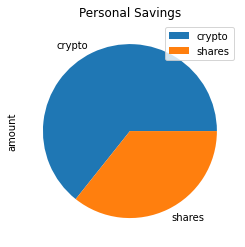

In [27]:
# Plot savings pie chart
df_savings.plot.pie(y='amount',title='Personal Savings')

In [29]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = total_crypto + total_shares

# Validate saving health
if (total_savings > emergency_fund):
    print("Congratulations! You have enough money in this fund")
elif (total_savings == emergency_fund):
    print("Congratulations on reaching this financial goal!")
else:
    diff = emergency_fund - total_savings
    print(f"You are ${diff} away from reaching your financial goal")

Congratulations! You have enough money in this fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [30]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-10-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-10-01', tz='America/New_York').isoformat()

In [32]:
# Get 5 years' worth of historical data for SPY and AGG
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_stock_data_1 = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df

df_stock_data = df_stock_data_1
# Display sample data
df_stock_data.head()

AGG                                        SPY  \
                             open    high     low   close     volume    open   
time                                                                           
2017-10-11 00:00:00-04:00  109.47  109.53  109.42  109.47  1576528.0     NaN   
2017-10-12 00:00:00-04:00  109.56  109.61  109.48  109.61  1797948.0  254.66   
2017-10-13 00:00:00-04:00  109.82  109.87  109.69  109.85  1573645.0  255.14   
2017-10-16 00:00:00-04:00  109.75  109.81  109.66  109.74  3556213.0  255.21   
2017-10-17 00:00:00-04:00  109.62  109.74  109.55  109.70  1638086.0  255.24   

                                                                
                             high      low   close      volume  
time                                                            
2017-10-11 00:00:00-04:00     NaN      NaN     NaN         NaN  
2017-10-12 00:00:00-04:00  255.06  254.365  254.60  32195167.0  
2017-10-13 00:00:00-04:00  255.27  254.640  254.91  33563533.0  
2017-10-16 00:00:00-04:00  255.51  254.820  255.30  25720677.0  
2017-10-17 00:00:00-04:00  255.52  254.980  255.46  23608473.0

In [33]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_stocks_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.4, 0.6],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [34]:
# Printing the simulation input data
MC_stocks_dist.portfolio_data.head()

AGG                                     \
                             open    high     low   close     volume   
time                                                                   
2017-10-11 00:00:00-04:00  109.47  109.53  109.42  109.47  1576528.0   
2017-10-12 00:00:00-04:00  109.56  109.61  109.48  109.61  1797948.0   
2017-10-13 00:00:00-04:00  109.82  109.87  109.69  109.85  1573645.0   
2017-10-16 00:00:00-04:00  109.75  109.81  109.66  109.74  3556213.0   
2017-10-17 00:00:00-04:00  109.62  109.74  109.55  109.70  1638086.0   

                                           SPY                           \
                          daily_return    open    high      low   close   
time                                                                      
2017-10-11 00:00:00-04:00          NaN     NaN     NaN      NaN     NaN   
2017-10-12 00:00:00-04:00     0.001279  254.66  255.06  254.365  254.60   
2017-10-13 00:00:00-04:00     0.002190  255.14  255.27  254.640  254.91   
2017-10-16 00:00:00-04:00    -0.001001  255.21  255.51  254.820  255.30   
2017-10-17 00:00:00-04:00    -0.000364  255.24  255.52  254.980  255.46   

                                                    
                               volume daily_return  
time                                                
2017-10-11 00:00:00-04:00         NaN          NaN  
2017-10-12 00:00:00-04:00  32195167.0          NaN  
2017-10-13 00:00:00-04:00  33563533.0     0.001218  
2017-10-16 00:00:00-04:00  25720677.0     0.001530  
2017-10-17 00:00:00-04:00  23608473.0     0.000627

In [35]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_stocks_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001863,0.997990,1.007115,1.013306,1.009799,0.996443,0.981516,1.007420,0.997449,0.984707,...,0.997197,0.984920,0.991901,0.998621,0.990182,0.997801,1.015686,1.000402,0.993997,1.006822
2,1.004442,0.977846,1.020919,1.016986,1.009258,1.026871,0.987852,1.013209,0.996342,0.979663,...,0.987472,0.992839,0.993309,1.015258,0.989907,1.007467,1.014097,0.998794,0.999254,1.014463
3,1.005461,0.976378,1.034543,1.003910,1.005880,1.016985,0.977472,1.029317,0.990011,0.982191,...,0.992130,0.991142,0.991315,1.017356,0.993742,1.015669,1.022659,0.982566,1.004459,1.011590
4,1.012947,0.982237,1.043936,0.999817,1.000347,1.014657,0.973020,1.026170,0.987626,0.983517,...,1.000791,0.989536,0.987131,1.019954,1.002250,1.018961,1.022813,0.980354,1.008255,1.007765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,8.582656,14.414040,8.994307,2.947182,18.744738,16.501156,7.005277,7.691986,16.806146,8.482863,...,8.208879,6.016702,24.719506,19.045938,23.037411,27.938103,36.310954,11.393332,8.333895,10.017951
7557,8.471189,14.381554,9.121045,2.898794,18.951714,16.490396,6.994087,7.664774,16.829720,8.450266,...,8.363980,6.030593,24.525809,19.004696,23.295622,27.706643,36.362784,11.239203,8.342664,9.980992
7558,8.337351,14.356621,8.990727,2.947966,18.895110,16.559402,7.079788,7.617877,16.627289,8.504385,...,8.299040,6.071792,24.568988,19.036018,23.132946,27.941347,36.283857,11.427550,8.297226,9.962112
7559,8.340808,14.211124,9.056185,2.930743,18.776748,16.825877,7.042095,7.691653,16.548768,8.520813,...,8.400831,6.048516,24.635503,19.152055,23.119876,28.065110,36.534323,11.405477,8.300541,9.806408


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

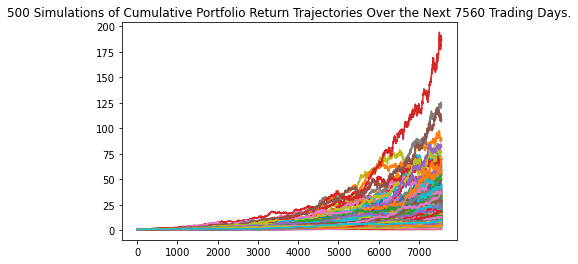

In [36]:
# Plot simulation outcomes
MC_stocks_dist.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

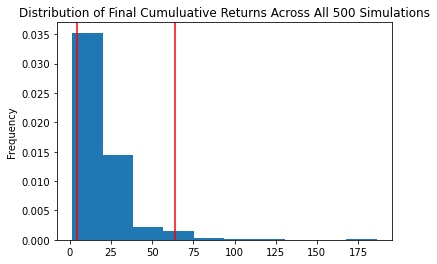

In [37]:
# Plot probability distribution and confidence intervals
MC_stocks_dist.plot_distribution()

### Retirement Analysis

In [38]:
# Fetch summary statistics from the Monte Carlo simulation results
summary = MC_stocks_dist.summarize_cumulative_return()

# Print summary statistics
summary

count           500.000000
mean             19.851471
std              16.598792
min               1.354572
25%               9.982640
50%              15.423711
75%              24.305390
max             186.279166
95% CI Lower      4.452892
95% CI Upper     63.606342
Name: 7560, dtype: float64

### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [39]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(summary[8]*initial_investment, 2)
ci_upper = round(summary[9]*initial_investment, 2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $89057.84 and $1272126.84


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [40]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(summary[8]*initial_investment, 2)
ci_upper = round(summary[9]*initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $133586.76 and $1908190.26
